In [1]:
print("Hello world!")

Hello world!


In [6]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, recall_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from tabulate import tabulate

In [7]:
X_nt = pd.read_csv("C:\Aniruddh\Python\Jupyter\RCC\CSV FILES\Cleaned data\RCC_non_test_set.csv", index_col = 0)
X_t = pd.read_csv("C:\Aniruddh\Python\Jupyter\RCC\CSV FILES\Cleaned data\RCC_test_set.csv", index_col = 0)
X = pd.concat([X_nt, X_t])
y = X.pop("RECURRENCE")
y_nt = X_nt.pop("RECURRENCE")
y_t = X_t.pop("RECURRENCE")

In [8]:
imputer = SimpleImputer(strategy = 'constant', fill_value = 0)
scaler = StandardScaler()
X_nt_sc_i = scaler.fit_transform(imputer.fit_transform(X_nt))
X_t_sc_i = scaler.transform(imputer.transform(X_t))

In [9]:
smote = SMOTE(random_state = 42)
X_nt_smote, y_nt_smote = smote.fit_resample(X_nt_sc_i, y_nt)

In [10]:
X_nt_sc_i.shape, X_nt_smote.shape, y_nt.shape, y_nt_smote.shape

((485, 27), (848, 27), (485,), (848,))

In [11]:
y_nt_smote.sum()

424

In [12]:
def grid_searcher(param_grid, estimator, scoring, X_train = X_nt_smote, y_train = y_nt_smote, cv = 10, verbose = 1):
    tic = time.time()
    grid_search = GridSearchCV(estimator = estimator, param_grid = param_grid, cv = cv, scoring = scoring, n_jobs = -1, verbose = verbose)
    grid_search.fit(X_train, y_train)
    toc = time.time()
    print(f"Time taken: {toc - tic} seconds")
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters: {best_params}")
    best_model = grid_search.best_estimator_
    return best_params, best_model

In [13]:
def model_test(best_estimator, X_test = X_t_sc_i, y_test = y_t, suppress_output = False):
    y_pred_test = best_estimator.predict(X_test)
    class_names = ['Class 0', 'Class 1']
    report_test = classification_report(y_test, y_pred_test, target_names = class_names)
    cm = confusion_matrix(y_test, y_pred_test)
    if not(suppress_output):
        print("Classification Report on Test Set:")
        print(report_test)
        cm_table = tabulate(cm, headers=class_names, tablefmt='grid')
        print("Confusion Matrix:")
        print(cm_table)
        plt.figure(figsize = (8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title('Confusion Matrix')
        plt.show()

In [14]:
model1 = XGBClassifier(random_state = 42)

In [15]:
model1.fit(X_nt_smote, y_nt_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.96      0.93       183
     Class 1       0.46      0.23      0.31        26

    accuracy                           0.87       209
   macro avg       0.68      0.60      0.62       209
weighted avg       0.84      0.87      0.85       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       176 |         7 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


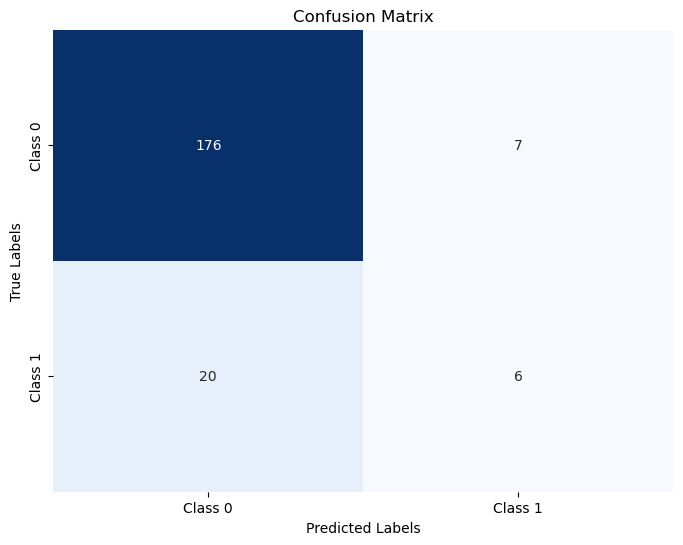

In [17]:
model_test(model1)

# RECALL

Fitting 10 folds for each of 620 candidates, totalling 6200 fits
Time taken: 128.13225078582764 seconds
Best Hyperparameters: {'max_depth': 7, 'n_estimators': 110, 'reg_lambda': 0.1}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93       183
     Class 1       0.53      0.31      0.39        26

    accuracy                           0.88       209
   macro avg       0.72      0.63      0.66       209
weighted avg       0.86      0.88      0.87       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       176 |         7 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


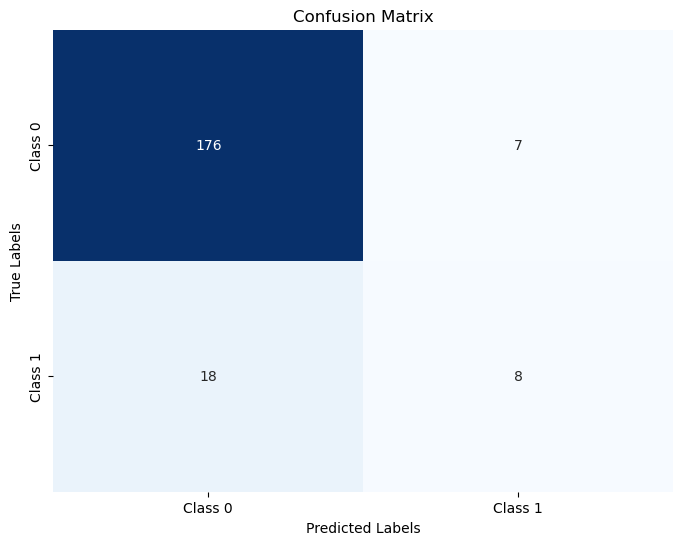

In [24]:
param_grid1a = {
    'n_estimators': list(np.arange(100, 401, 10)),
    'max_depth': [3, 4, 5, 6, 7],
    'reg_lambda': [0.1, 1, 10, 100],
}
best_params1a, best_model1a = grid_searcher(param_grid1a, model1, 'recall')
model_test(best_model1a)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
Time taken: 108.79321026802063 seconds
Best Hyperparameters: {'learning_rate': 0.01, 'reg_lambda': 0.4}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.93      0.83      0.88       183
     Class 1       0.31      0.54      0.39        26

    accuracy                           0.79       209
   macro avg       0.62      0.68      0.64       209
weighted avg       0.85      0.79      0.82       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       152 |        31 |
+-----------+-----------+
|        12 |        14 |
+-----------+-----------+


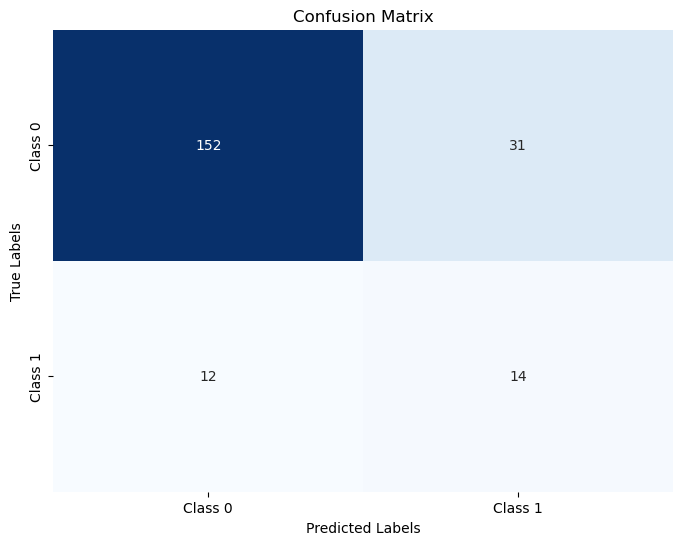

In [25]:
param_grid1b = {
    'reg_lambda': list(np.arange(0.1, 10.1, 0.1)),
    'learning_rate': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
}
best_params1b, best_model1b = grid_searcher(param_grid1b, best_model1a, 'recall')
model_test(best_model1b)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Time taken: 25.312013626098633 seconds
Best Hyperparameters: {'learning_rate': 0.007}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.92      0.84      0.88       183
     Class 1       0.31      0.50      0.38        26

    accuracy                           0.80       209
   macro avg       0.62      0.67      0.63       209
weighted avg       0.85      0.80      0.82       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       154 |        29 |
+-----------+-----------+
|        13 |        13 |
+-----------+-----------+


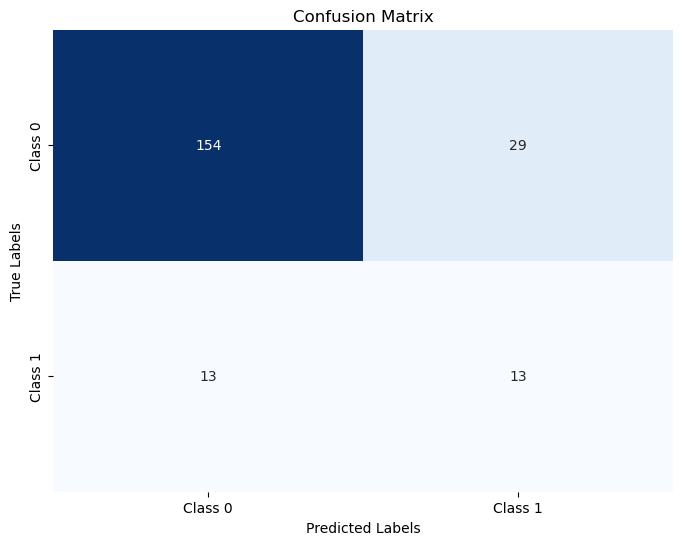

In [27]:
param_grid1c = {
    'learning_rate': list(np.arange(1e-3, 0.101, 1e-3))
}
best_params1c, best_model1c = grid_searcher(param_grid1c, best_model1b, 'recall')
model_test(best_model1c)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
Time taken: 31.371222019195557 seconds
Best Hyperparameters: {'colsample_bytree': 0.9, 'min_child_weight': 1, 'subsample': 1.0}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.92      0.87      0.89       183
     Class 1       0.33      0.46      0.39        26

    accuracy                           0.82       209
   macro avg       0.63      0.67      0.64       209
weighted avg       0.85      0.82      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       159 |        24 |
+-----------+-----------+
|        14 |        12 |
+-----------+-----------+


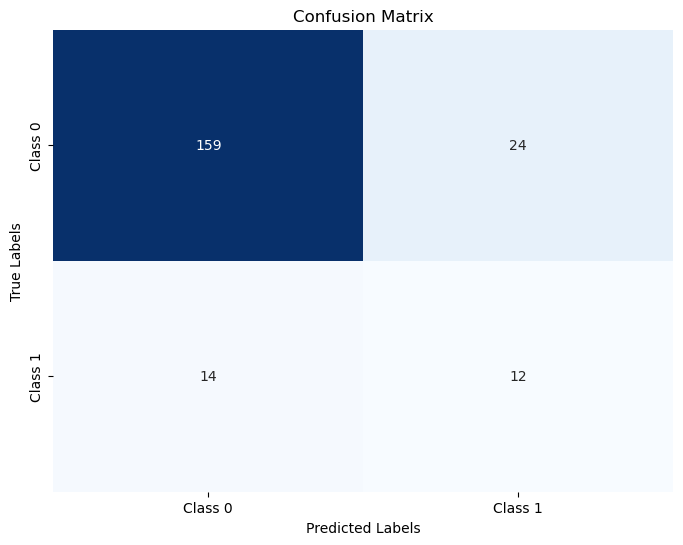

In [31]:
param_grid1d = {
    'min_child_weight': [1, 2, 3, 4, 5],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}
best_params1d, best_model1d = grid_searcher(param_grid1d, best_model1c, 'recall')
model_test(best_model1d)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Time taken: 3.4429211616516113 seconds
Best Hyperparameters: {'gamma': 0, 'max_delta_step': 0}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.92      0.87      0.89       183
     Class 1       0.33      0.46      0.39        26

    accuracy                           0.82       209
   macro avg       0.63      0.67      0.64       209
weighted avg       0.85      0.82      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       159 |        24 |
+-----------+-----------+
|        14 |        12 |
+-----------+-----------+


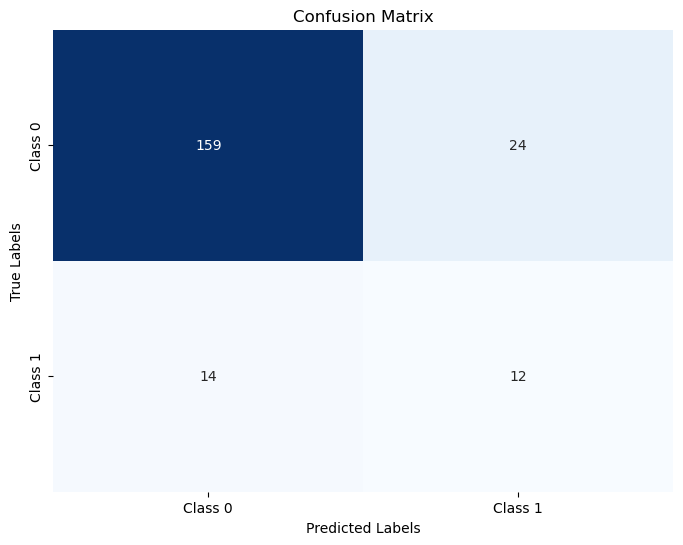

In [33]:
param_grid1e = {
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    # 'reg_alpha': [0.1, 1, 10, 100],
    # 'scale_pos_weight': [1, 2, 3, 4, 5],
    'max_delta_step': [0, 1, 2],
}
best_params1e, best_model1e = grid_searcher(param_grid1e, best_model1d, 'recall')
model_test(best_model1e)

# PRECISION

Fitting 10 folds for each of 620 candidates, totalling 6200 fits
Time taken: 126.54837703704834 seconds
Best Hyperparameters: {'max_depth': 5, 'n_estimators': 100, 'reg_lambda': 10}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.95      0.93       183
     Class 1       0.47      0.35      0.40        26

    accuracy                           0.87       209
   macro avg       0.69      0.65      0.66       209
weighted avg       0.86      0.87      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       173 |        10 |
+-----------+-----------+
|        17 |         9 |
+-----------+-----------+


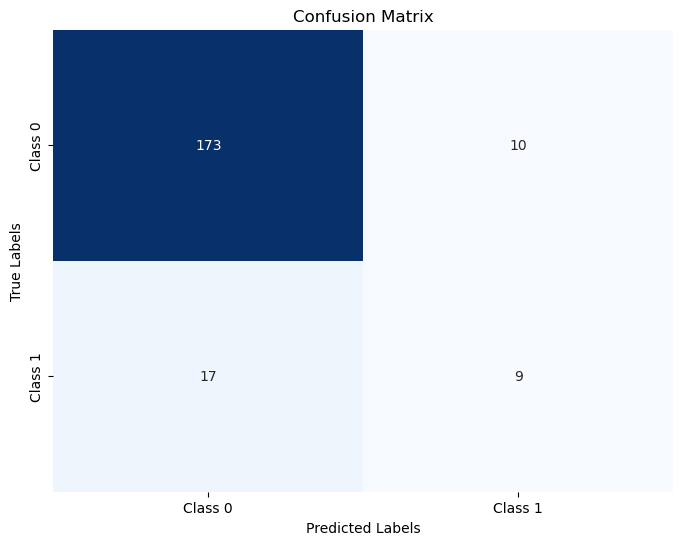

In [36]:
param_grid2a = {
    'n_estimators': list(np.arange(100, 401, 10)),
    'max_depth': [3, 4, 5, 6, 7],
    'reg_lambda': [0.1, 1, 10, 100],
}
best_params2a, best_model2a = grid_searcher(param_grid2a, model1, 'precision')
model_test(best_model2a)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
Time taken: 69.05445098876953 seconds
Best Hyperparameters: {'learning_rate': 1, 'reg_lambda': 23}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.95      0.93       183
     Class 1       0.44      0.31      0.36        26

    accuracy                           0.87       209
   macro avg       0.68      0.63      0.64       209
weighted avg       0.85      0.87      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       173 |        10 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


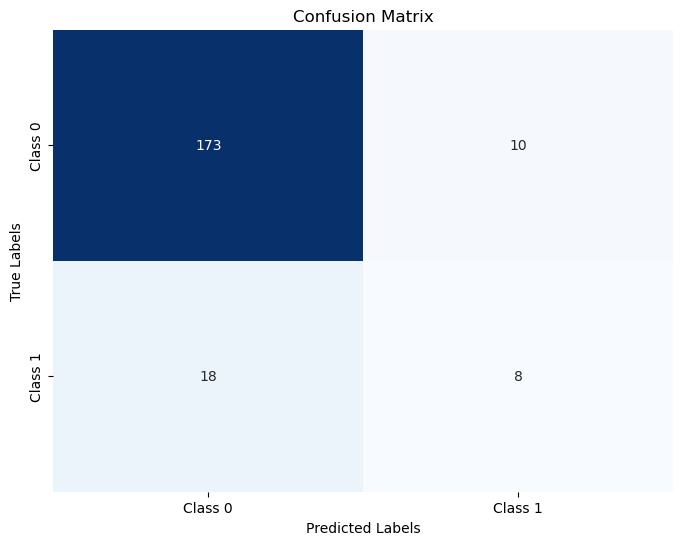

In [37]:
param_grid2b = {
    'reg_lambda': list(np.arange(1, 101)),
    'learning_rate': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
}
best_params2b, best_model2b = grid_searcher(param_grid2b, best_model2a, 'precision')
model_test(best_model2b)

Fitting 10 folds for each of 99 candidates, totalling 990 fits
Time taken: 11.576816082000732 seconds
Best Hyperparameters: {'learning_rate': 0.55}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.93      0.91       183
     Class 1       0.33      0.23      0.27        26

    accuracy                           0.85       209
   macro avg       0.61      0.58      0.59       209
weighted avg       0.83      0.85      0.83       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       171 |        12 |
+-----------+-----------+
|        20 |         6 |
+-----------+-----------+


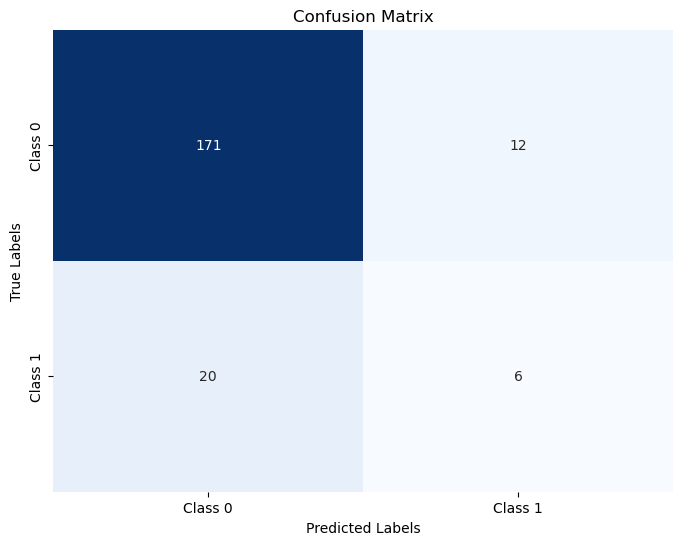

In [38]:
param_grid2c = {
    'learning_rate': list(np.arange(0.01, 1, 0.01))
}
best_params2c, best_model2c = grid_searcher(param_grid2c, best_model2b, 'precision')
model_test(best_model2c)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Time taken: 10.082744836807251 seconds
Best Hyperparameters: {'colsample_bytree': 0.5, 'min_child_weight': 1, 'subsample': 0.9}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.96      0.93       183
     Class 1       0.47      0.27      0.34        26

    accuracy                           0.87       209
   macro avg       0.68      0.61      0.63       209
weighted avg       0.85      0.87      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        19 |         7 |
+-----------+-----------+


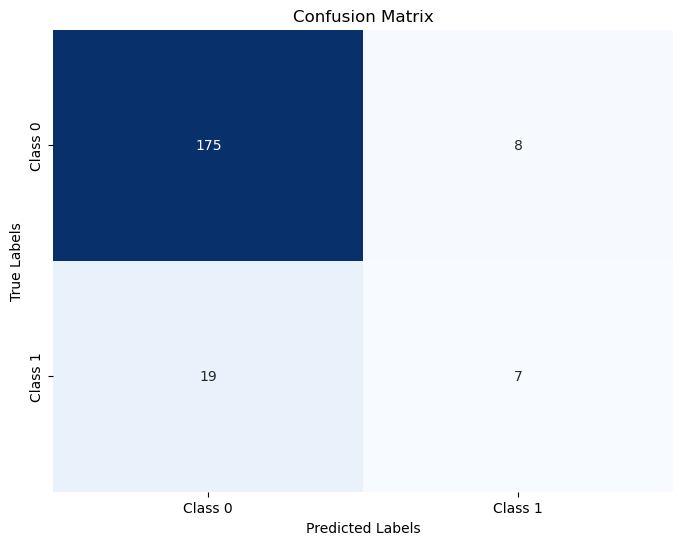

In [40]:
param_grid2d = {
    'min_child_weight': [1, 2, 3],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
}
best_params2d, best_model2d = grid_searcher(param_grid2d, best_model2c, 'precision')
model_test(best_model2d)

Fitting 10 folds for each of 375 candidates, totalling 3750 fits
Time taken: 23.848947763442993 seconds
Best Hyperparameters: {'gamma': 0.1, 'max_delta_step': 0, 'reg_alpha': 0.1, 'scale_pos_weight': 1}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93       183
     Class 1       0.50      0.31      0.38        26

    accuracy                           0.88       209
   macro avg       0.70      0.63      0.66       209
weighted avg       0.86      0.88      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


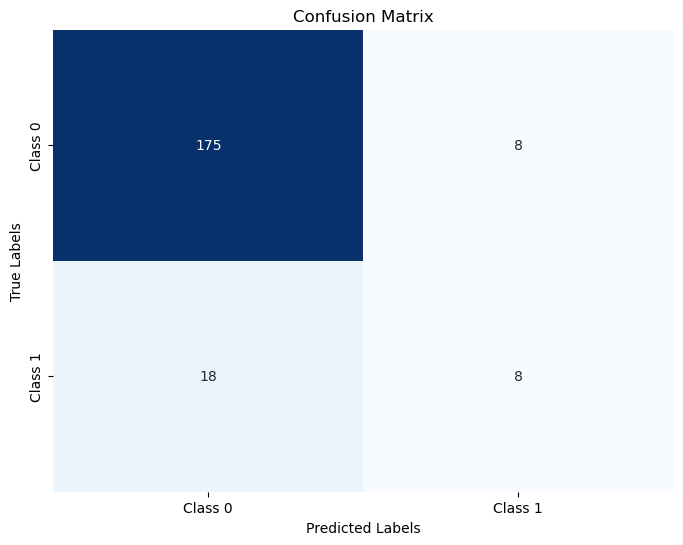

In [41]:
param_grid2e = {
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0.01, 0.1, 1, 10, 100],
    'scale_pos_weight': [1, 2, 3, 4, 5],
    'max_delta_step': [0, 1, 2],
}
best_params2e, best_model2e = grid_searcher(param_grid2e, best_model2d, 'precision')
model_test(best_model2e)

Fitting 10 folds for each of 99 candidates, totalling 990 fits
Time taken: 7.194322109222412 seconds
Best Hyperparameters: {'reg_alpha': 0.09}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.97      0.94       183
     Class 1       0.57      0.31      0.40        26

    accuracy                           0.89       209
   macro avg       0.74      0.64      0.67       209
weighted avg       0.87      0.89      0.87       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       177 |         6 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


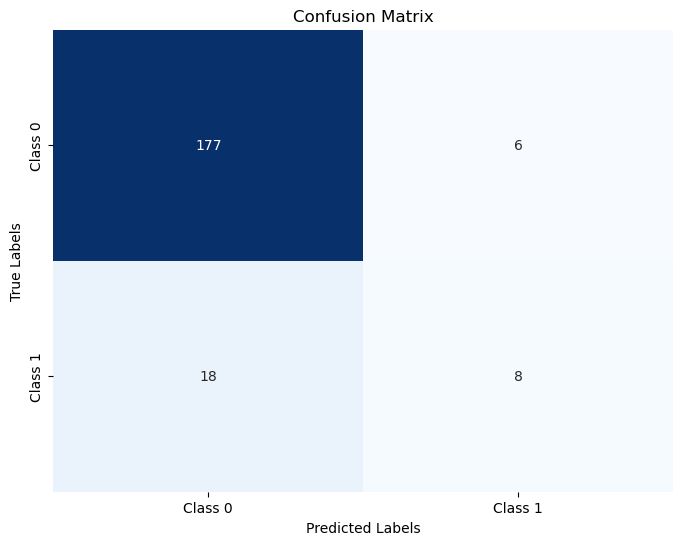

In [42]:
param_grid2f = {
    'reg_alpha': list(np.arange(0.01, 1, 0.01))
}
best_params2f, best_model2f = grid_searcher(param_grid2f, best_model2e, 'precision')
model_test(best_model2f)

# F1

Fitting 10 folds for each of 620 candidates, totalling 6200 fits
Time taken: 123.42095232009888 seconds
Best Hyperparameters: {'max_depth': 7, 'n_estimators': 180, 'reg_lambda': 0.1}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93       183
     Class 1       0.53      0.31      0.39        26

    accuracy                           0.88       209
   macro avg       0.72      0.63      0.66       209
weighted avg       0.86      0.88      0.87       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       176 |         7 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


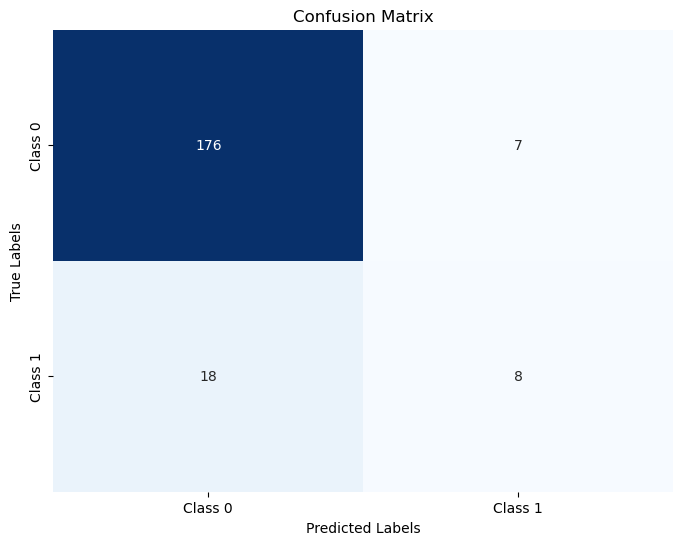

In [44]:
param_grid3a = {
    'n_estimators': list(np.arange(100, 401, 10)),
    'max_depth': [3, 4, 5, 6, 7],
    'reg_lambda': [0.1, 1, 10, 100],
}
best_params3a, best_model3a = grid_searcher(param_grid3a, model1, 'f1')
model_test(best_model3a)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Time taken: 7.2226786613464355 seconds
Best Hyperparameters: {'max_depth': 7}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93       183
     Class 1       0.53      0.31      0.39        26

    accuracy                           0.88       209
   macro avg       0.72      0.63      0.66       209
weighted avg       0.86      0.88      0.87       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       176 |         7 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


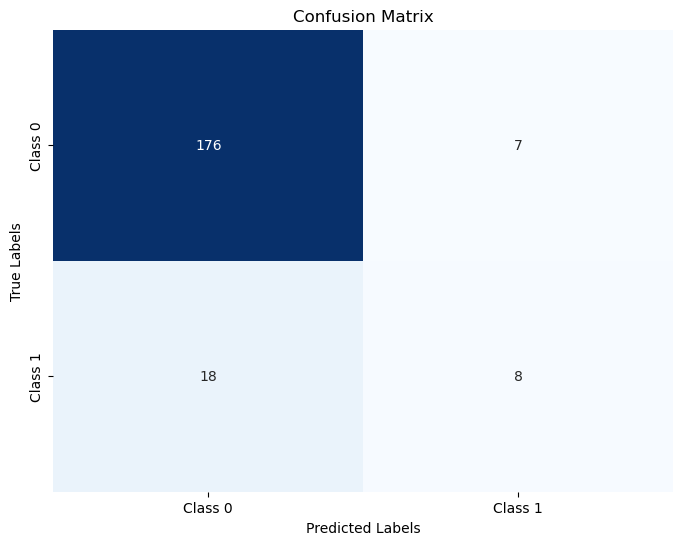

In [68]:
param_grid3ai = {
    'max_depth': [5, 6, 7, 8, 9],
}
best_params3ai, best_model3ai = grid_searcher(param_grid3ai, best_model3a, 'f1')
model_test(best_model3ai)

Fitting 10 folds for each of 594 candidates, totalling 5940 fits
Time taken: 212.0820643901825 seconds
Best Hyperparameters: {'learning_rate': 1, 'reg_lambda': 2.8000000000000003}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93       183
     Class 1       0.50      0.31      0.38        26

    accuracy                           0.88       209
   macro avg       0.70      0.63      0.66       209
weighted avg       0.86      0.88      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


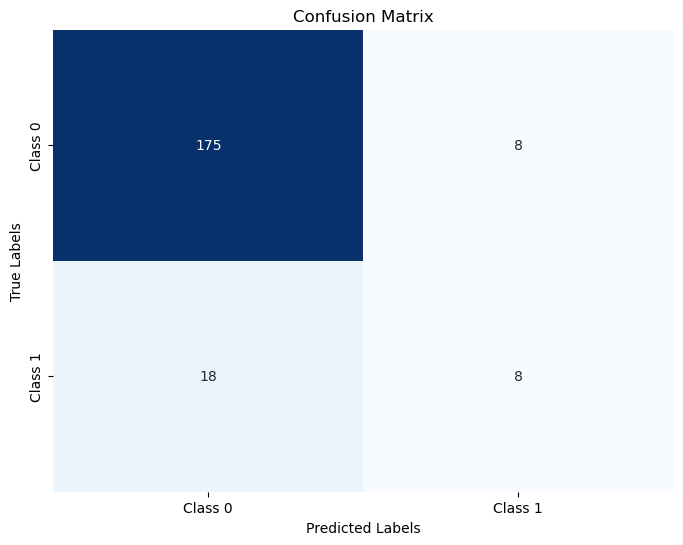

In [69]:
param_grid3b = {
    'reg_lambda': list(np.arange(0.1, 10, 0.1)),
    'learning_rate': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
}
best_params3b, best_model3b = grid_searcher(param_grid3b, best_model3a, 'f1')
model_test(best_model3b)

Fitting 10 folds for each of 99 candidates, totalling 990 fits
Time taken: 23.40449833869934 seconds
Best Hyperparameters: {'learning_rate': 0.19}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93       183
     Class 1       0.50      0.31      0.38        26

    accuracy                           0.88       209
   macro avg       0.70      0.63      0.66       209
weighted avg       0.86      0.88      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


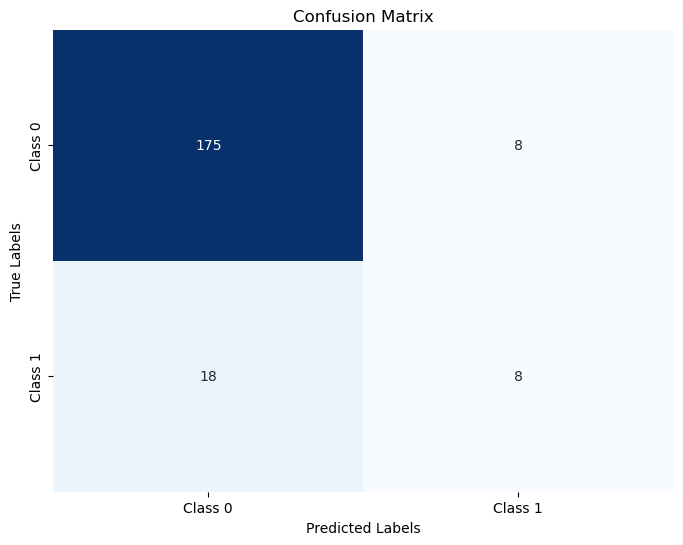

In [70]:
param_grid3c = {
    'learning_rate': list(np.arange(0.01, 1, 0.01)),
}
best_params3c, best_model3c = grid_searcher(param_grid3c, best_model3b, 'f1')
model_test(best_model3c)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Time taken: 23.33830952644348 seconds
Best Hyperparameters: {'colsample_bytree': 0.8, 'min_child_weight': 1, 'subsample': 0.5}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93       183
     Class 1       0.53      0.31      0.39        26

    accuracy                           0.88       209
   macro avg       0.72      0.63      0.66       209
weighted avg       0.86      0.88      0.87       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       176 |         7 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


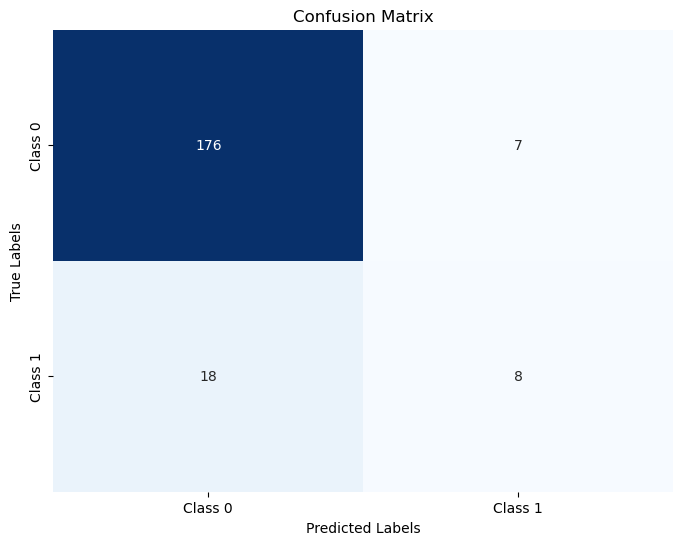

In [71]:
param_grid3d = {
    'min_child_weight': [1, 2, 3],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
}
best_params3d, best_model3d = grid_searcher(param_grid3d, best_model3c, 'f1')
model_test(best_model3d)

Fitting 10 folds for each of 375 candidates, totalling 3750 fits
Time taken: 71.18064141273499 seconds
Best Hyperparameters: {'gamma': 0.1, 'max_delta_step': 0, 'reg_alpha': 0.1, 'scale_pos_weight': 2}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.92      0.92       183
     Class 1       0.39      0.35      0.37        26

    accuracy                           0.85       209
   macro avg       0.65      0.63      0.64       209
weighted avg       0.84      0.85      0.85       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       169 |        14 |
+-----------+-----------+
|        17 |         9 |
+-----------+-----------+


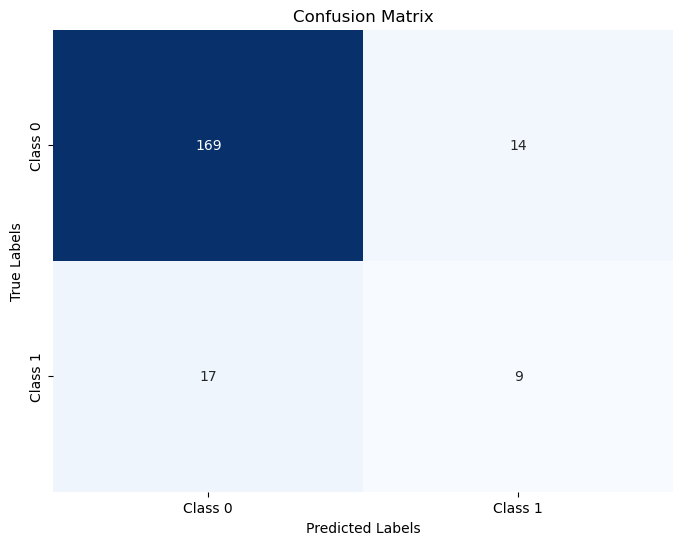

In [72]:
param_grid3e = {
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0.01, 0.1, 1, 10, 100],
    'scale_pos_weight': [1, 2, 3, 4, 5],
    'max_delta_step': [0, 1, 2],
}
best_params3e, best_model3e = grid_searcher(param_grid3e, best_model3d, 'f1')
model_test(best_model3e)

Fitting 10 folds for each of 99 candidates, totalling 990 fits
Time taken: 24.78368616104126 seconds
Best Hyperparameters: {'reg_alpha': 0.55}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.93      0.92       183
     Class 1       0.45      0.38      0.42        26

    accuracy                           0.87       209
   macro avg       0.68      0.66      0.67       209
weighted avg       0.86      0.87      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       171 |        12 |
+-----------+-----------+
|        16 |        10 |
+-----------+-----------+


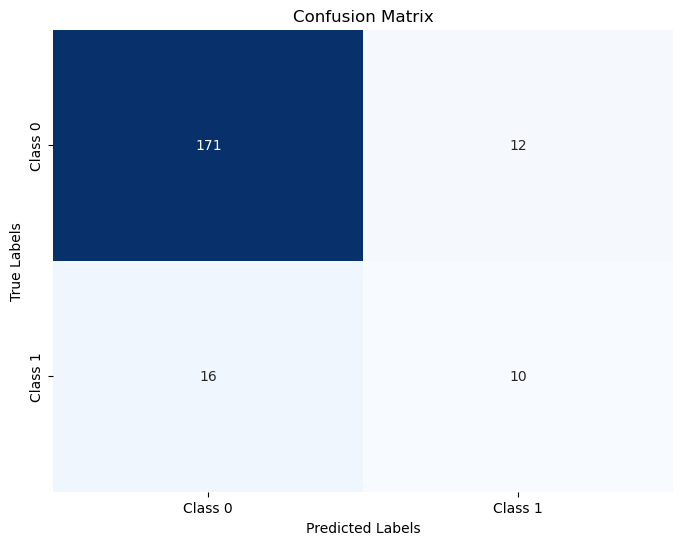

In [73]:
param_grid3f = {
    'reg_alpha': list(np.arange(0.01, 1, 0.01))
}
best_params3f, best_model3f = grid_searcher(param_grid3f, best_model3e, 'f1')
model_test(best_model3f)

# ROC_AUC

Fitting 10 folds for each of 620 candidates, totalling 6200 fits
Time taken: 173.56778645515442 seconds
Best Hyperparameters: {'max_depth': 5, 'n_estimators': 100, 'reg_lambda': 10}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.95      0.93       183
     Class 1       0.47      0.35      0.40        26

    accuracy                           0.87       209
   macro avg       0.69      0.65      0.66       209
weighted avg       0.86      0.87      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       173 |        10 |
+-----------+-----------+
|        17 |         9 |
+-----------+-----------+


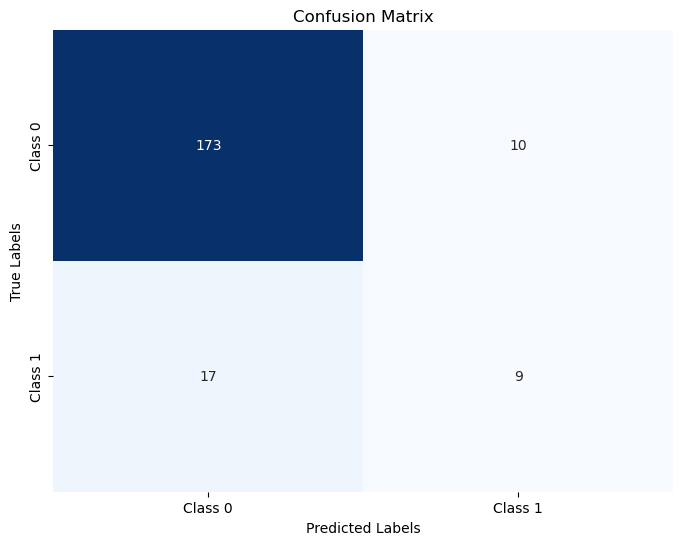

In [51]:
param_grid4a = {
    'n_estimators': list(np.arange(100, 401, 10)),
    'max_depth': [3, 4, 5, 6, 7],
    'reg_lambda': [0.1, 1, 10, 100],
}
best_params4a, best_model4a = grid_searcher(param_grid4a, model1, 'roc_auc')
model_test(best_model4a)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
Time taken: 106.80489659309387 seconds
Best Hyperparameters: {'learning_rate': 1, 'reg_lambda': 41}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.94      0.92       183
     Class 1       0.42      0.31      0.36        26

    accuracy                           0.86       209
   macro avg       0.66      0.62      0.64       209
weighted avg       0.85      0.86      0.85       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       172 |        11 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


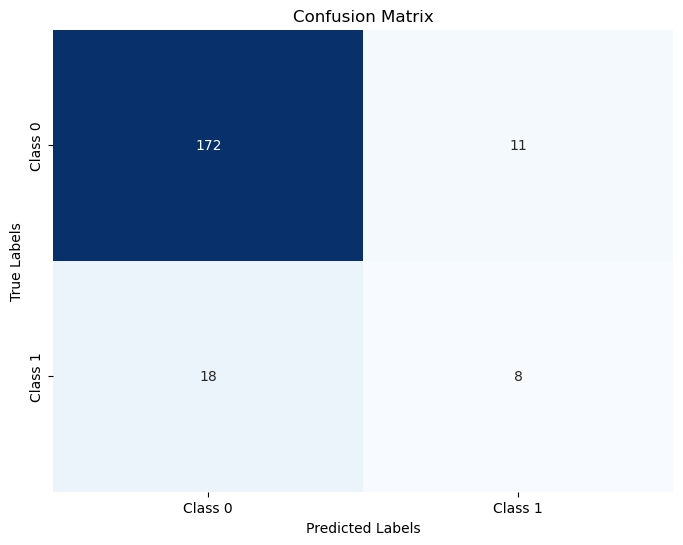

In [52]:
param_grid4b = {
    'reg_lambda': list(np.arange(1, 101)),
    'learning_rate': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
}
best_params4b, best_model4b = grid_searcher(param_grid4b, best_model4a, 'roc_auc')
model_test(best_model4b)

Fitting 10 folds for each of 99 candidates, totalling 990 fits
Time taken: 16.45188069343567 seconds
Best Hyperparameters: {'learning_rate': 0.92}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.95      0.93       183
     Class 1       0.44      0.31      0.36        26

    accuracy                           0.87       209
   macro avg       0.68      0.63      0.64       209
weighted avg       0.85      0.87      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       173 |        10 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


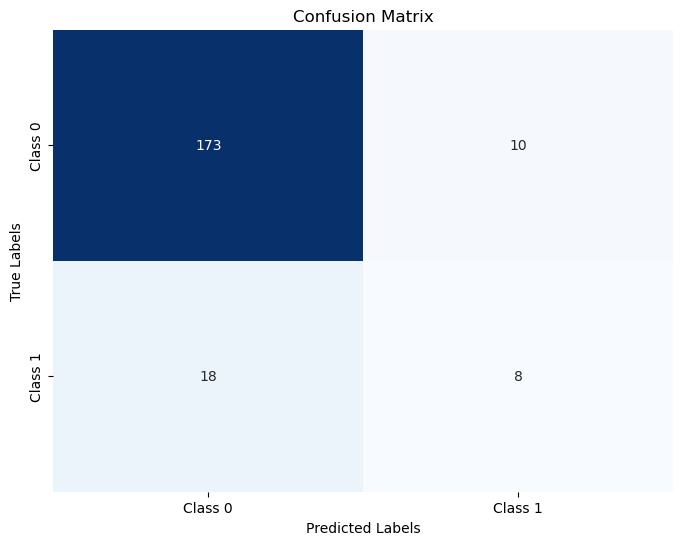

In [53]:
param_grid4c = {
    'learning_rate': list(np.arange(0.01, 1, 0.01))
}
best_params4c, best_model4c = grid_searcher(param_grid4c, best_model4b, 'roc_auc')
model_test(best_model4c)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Time taken: 16.110392570495605 seconds
Best Hyperparameters: {'colsample_bytree': 0.7, 'min_child_weight': 1, 'subsample': 0.5}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.92      0.91       183
     Class 1       0.38      0.35      0.36        26

    accuracy                           0.85       209
   macro avg       0.64      0.63      0.64       209
weighted avg       0.84      0.85      0.84       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       168 |        15 |
+-----------+-----------+
|        17 |         9 |
+-----------+-----------+


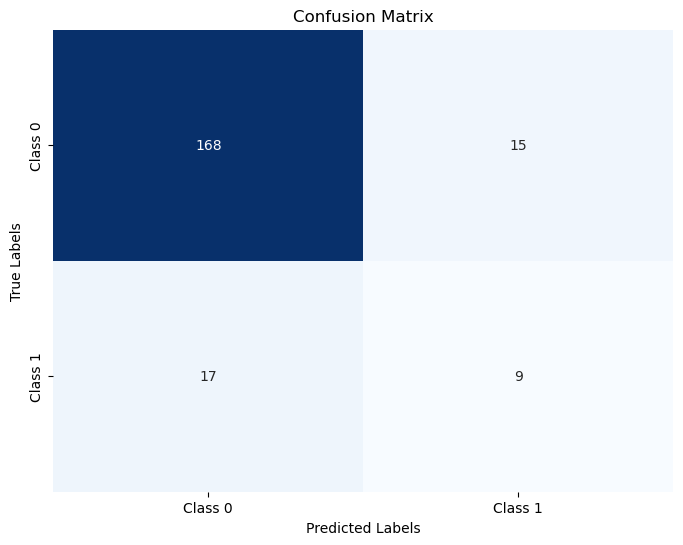

In [54]:
param_grid4d = {
    'min_child_weight': [1, 2, 3],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
}
best_params4d, best_model4d = grid_searcher(param_grid4d, best_model4c, 'roc_auc')
model_test(best_model4d)

Fitting 10 folds for each of 375 candidates, totalling 3750 fits
Time taken: 33.530014991760254 seconds
Best Hyperparameters: {'gamma': 0, 'max_delta_step': 0, 'reg_alpha': 0.01, 'scale_pos_weight': 1}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.95      0.93       183
     Class 1       0.47      0.35      0.40        26

    accuracy                           0.87       209
   macro avg       0.69      0.65      0.66       209
weighted avg       0.86      0.87      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       173 |        10 |
+-----------+-----------+
|        17 |         9 |
+-----------+-----------+


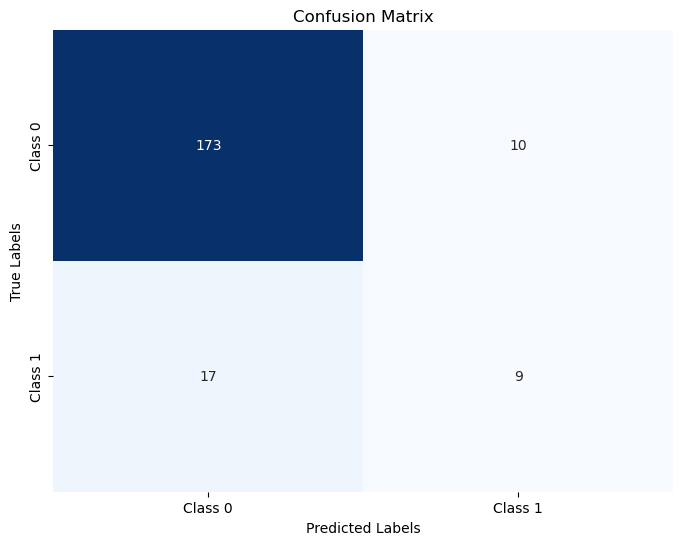

In [55]:
param_grid4e = {
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0.01, 0.1, 1, 10, 100],
    'scale_pos_weight': [1, 2, 3, 4, 5],
    'max_delta_step': [0, 1, 2],
}
best_params4e, best_model4e = grid_searcher(param_grid4e, best_model4d, 'roc_auc')
model_test(best_model4e)

Fitting 10 folds for each of 99 candidates, totalling 990 fits
Time taken: 14.650044679641724 seconds
Best Hyperparameters: {'reg_alpha': 0.13}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.95      0.93       183
     Class 1       0.47      0.35      0.40        26

    accuracy                           0.87       209
   macro avg       0.69      0.65      0.66       209
weighted avg       0.86      0.87      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       173 |        10 |
+-----------+-----------+
|        17 |         9 |
+-----------+-----------+


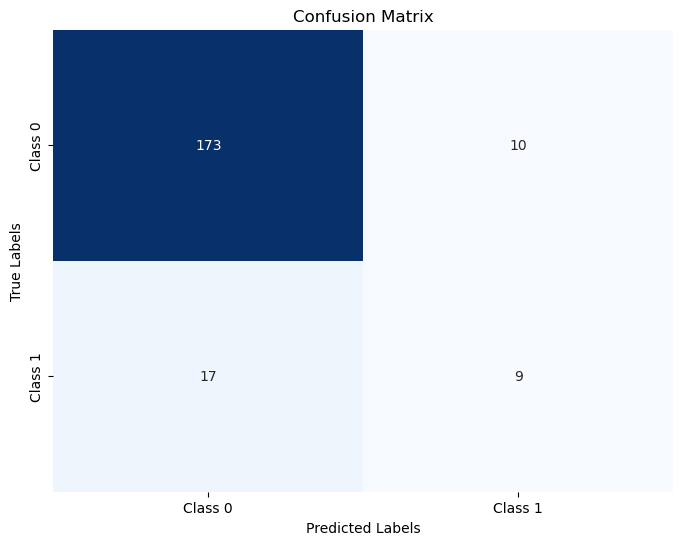

In [56]:
param_grid4f = {
    'reg_alpha': list(np.arange(0.01, 1, 0.01)),
}
best_params4f, best_model4f = grid_searcher(param_grid4f, best_model4e, 'roc_auc')
model_test(best_model4f)

# MATTHEWS_CORRCOEF

Fitting 10 folds for each of 620 candidates, totalling 6200 fits
Time taken: 194.98916864395142 seconds
Best Hyperparameters: {'max_depth': 7, 'n_estimators': 180, 'reg_lambda': 0.1}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93       183
     Class 1       0.53      0.31      0.39        26

    accuracy                           0.88       209
   macro avg       0.72      0.63      0.66       209
weighted avg       0.86      0.88      0.87       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       176 |         7 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


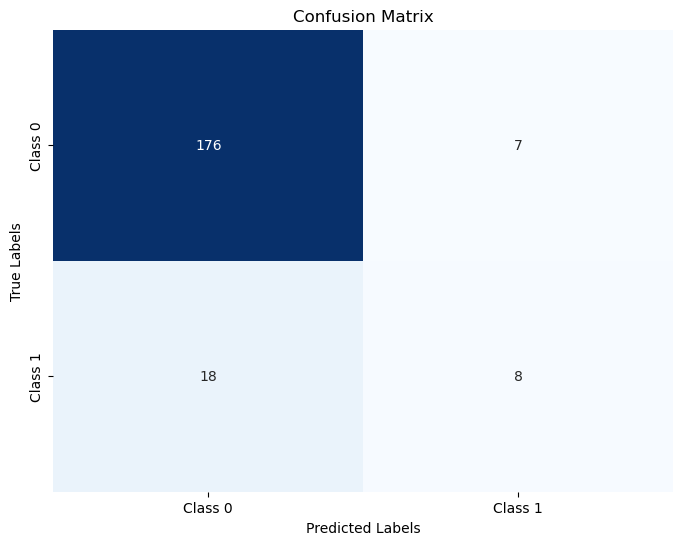

In [58]:
param_grid5a = {
    'n_estimators': list(np.arange(100, 401, 10)),
    'max_depth': [3, 4, 5, 6, 7],
    'reg_lambda': [0.1, 1, 10, 100],
}
best_params5a, best_model5a = grid_searcher(param_grid5a, model1, 'matthews_corrcoef')
model_test(best_model5a)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Time taken: 1.3743977546691895 seconds
Best Hyperparameters: {'max_depth': 7}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93       183
     Class 1       0.53      0.31      0.39        26

    accuracy                           0.88       209
   macro avg       0.72      0.63      0.66       209
weighted avg       0.86      0.88      0.87       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       176 |         7 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


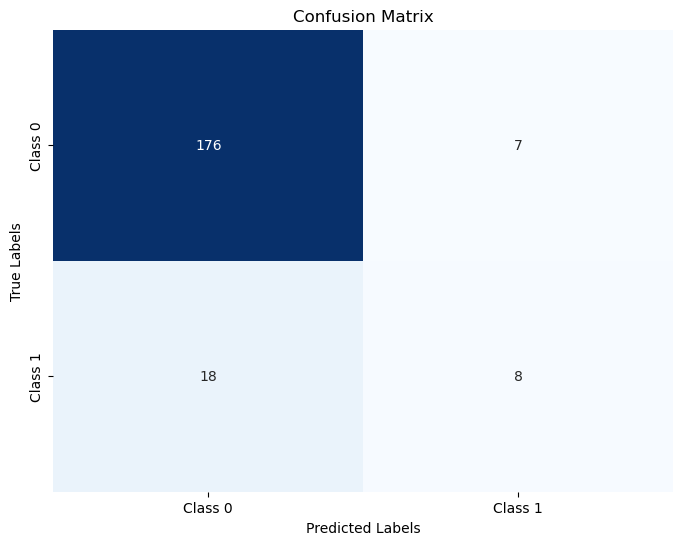

In [74]:
param_grid5ai = {
    'max_depth': [5, 6, 7, 8, 9],
}
best_params5ai, best_model5ai = grid_searcher(param_grid5ai, best_model5a, 'matthews_corrcoef')
model_test(best_model5ai)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
Time taken: 238.18599891662598 seconds
Best Hyperparameters: {'learning_rate': 0.1, 'reg_lambda': 4.3}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.97      0.94       183
     Class 1       0.57      0.31      0.40        26

    accuracy                           0.89       209
   macro avg       0.74      0.64      0.67       209
weighted avg       0.87      0.89      0.87       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       177 |         6 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


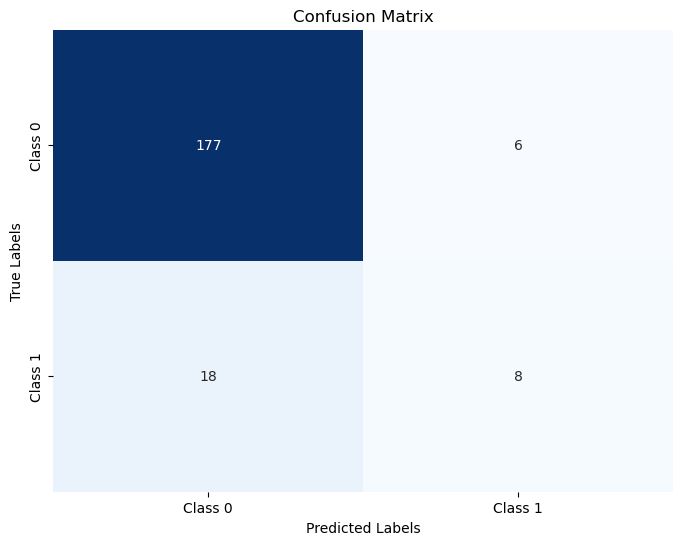

In [62]:
param_grid5b = {
    'reg_lambda': list(np.arange(0.1, 10.1, 0.1)),
    'learning_rate': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
}
best_params5b, best_model5b = grid_searcher(param_grid5b, best_model5a, 'matthews_corrcoef')
model_test(best_model5b)

Fitting 10 folds for each of 99 candidates, totalling 990 fits
Time taken: 33.136059045791626 seconds
Best Hyperparameters: {'learning_rate': 0.09999999999999999}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.97      0.94       183
     Class 1       0.57      0.31      0.40        26

    accuracy                           0.89       209
   macro avg       0.74      0.64      0.67       209
weighted avg       0.87      0.89      0.87       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       177 |         6 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


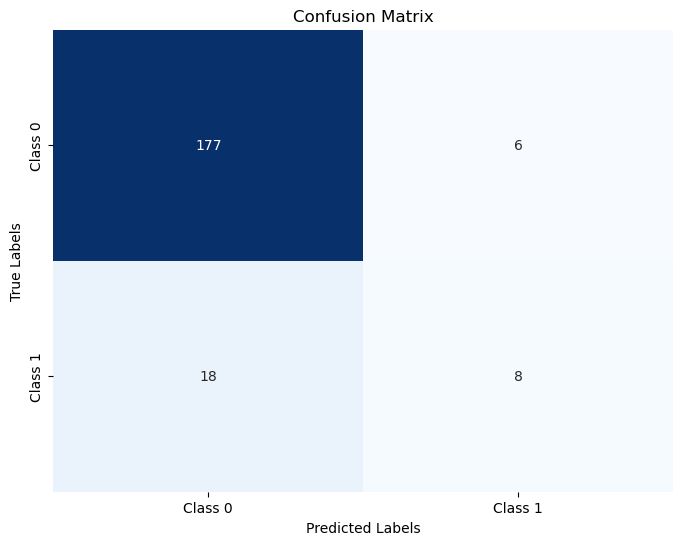

In [63]:
param_grid5c = {
    'learning_rate': list(np.arange(0.01, 1, 0.01))
}
best_params5c, best_model5c = grid_searcher(param_grid5c, best_model5b, 'matthews_corrcoef')
model_test(best_model5c)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
Time taken: 47.61540389060974 seconds
Best Hyperparameters: {'colsample_bytree': 0.8, 'min_child_weight': 1, 'subsample': 0.7}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.96      0.93       183
     Class 1       0.47      0.27      0.34        26

    accuracy                           0.87       209
   macro avg       0.68      0.61      0.63       209
weighted avg       0.85      0.87      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        19 |         7 |
+-----------+-----------+


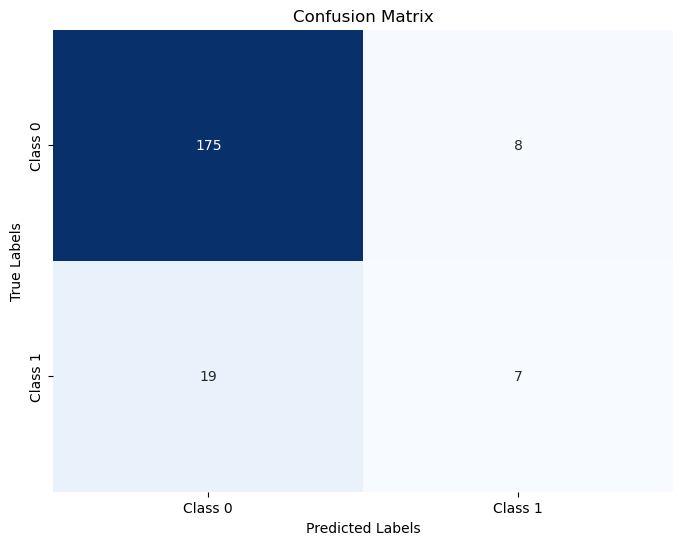

In [64]:
param_grid5d = {
    'min_child_weight': [1, 2, 3, 4, 5],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
}
best_params5d, best_model5d = grid_searcher(param_grid5d, best_model5c, 'matthews_corrcoef')
model_test(best_model5d)

Fitting 10 folds for each of 375 candidates, totalling 3750 fits
Time taken: 92.52655124664307 seconds
Best Hyperparameters: {'gamma': 0.3, 'max_delta_step': 2, 'reg_alpha': 0.01, 'scale_pos_weight': 1}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93       183
     Class 1       0.50      0.31      0.38        26

    accuracy                           0.88       209
   macro avg       0.70      0.63      0.66       209
weighted avg       0.86      0.88      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


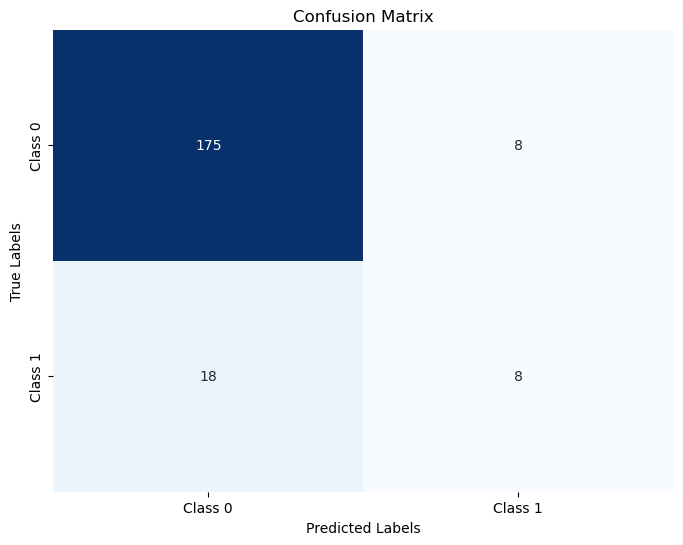

In [65]:
param_grid5e = {
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0.01, 0.1, 1, 10, 100],
    'scale_pos_weight': [1, 2, 3, 4, 5],
    'max_delta_step': [0, 1, 2],
}
best_params5e, best_model5e = grid_searcher(param_grid5e, best_model5d, 'matthews_corrcoef')
model_test(best_model5e)

Fitting 10 folds for each of 495 candidates, totalling 4950 fits
Time taken: 137.64150547981262 seconds
Best Hyperparameters: {'max_delta_step': 2, 'reg_alpha': 0.01}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93       183
     Class 1       0.50      0.31      0.38        26

    accuracy                           0.88       209
   macro avg       0.70      0.63      0.66       209
weighted avg       0.86      0.88      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


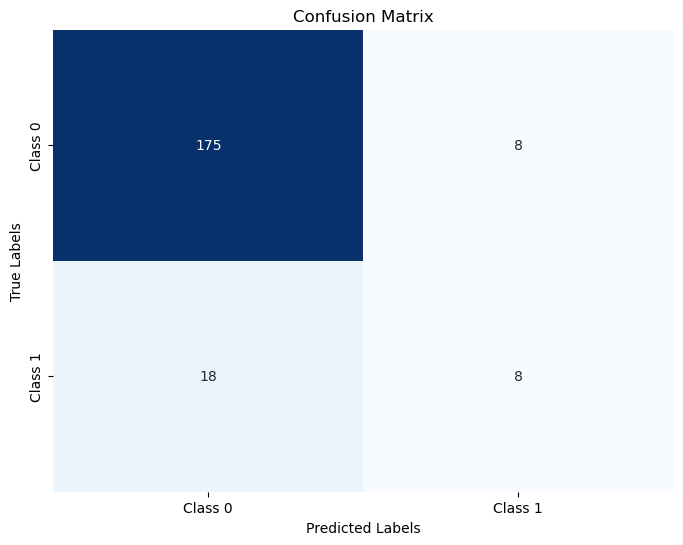

In [75]:
param_grid5f = {
    'reg_alpha': list(np.arange(0.01, 1, 0.01)),
    'max_delta_step': [0, 1, 2, 3, 4],
}
best_params5f, best_model5f = grid_searcher(param_grid5f, best_model5e, 'matthews_corrcoef')
model_test(best_model5f)

# AVERAGE_PRECISION

Fitting 10 folds for each of 620 candidates, totalling 6200 fits
Time taken: 183.8409583568573 seconds
Best Hyperparameters: {'max_depth': 7, 'n_estimators': 100, 'reg_lambda': 0.1}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93       183
     Class 1       0.53      0.31      0.39        26

    accuracy                           0.88       209
   macro avg       0.72      0.63      0.66       209
weighted avg       0.86      0.88      0.87       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       176 |         7 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


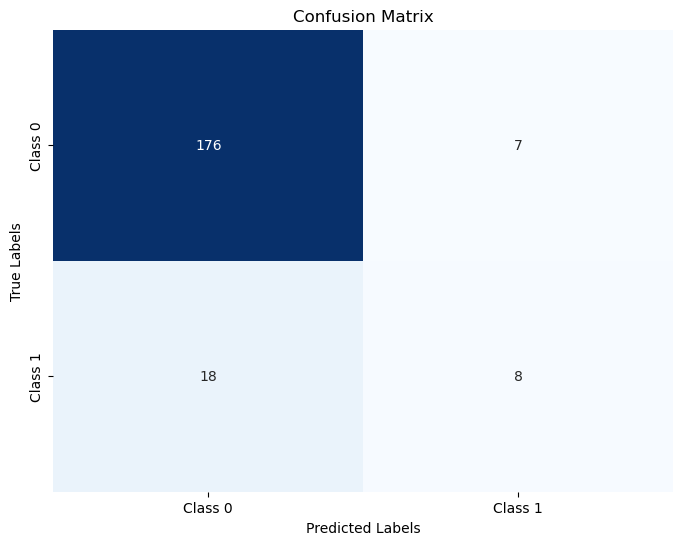

In [77]:
param_grid6a = {
    'n_estimators': list(np.arange(100, 401, 10)),
    'max_depth': [3, 4, 5, 6, 7],
    'reg_lambda': [0.1, 1, 10, 100],
}
best_params6a, best_model6a = grid_searcher(param_grid6a, model1, 'average_precision')
model_test(best_model6a)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Time taken: 1.2597432136535645 seconds
Best Hyperparameters: {'max_depth': 7}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93       183
     Class 1       0.53      0.31      0.39        26

    accuracy                           0.88       209
   macro avg       0.72      0.63      0.66       209
weighted avg       0.86      0.88      0.87       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       176 |         7 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


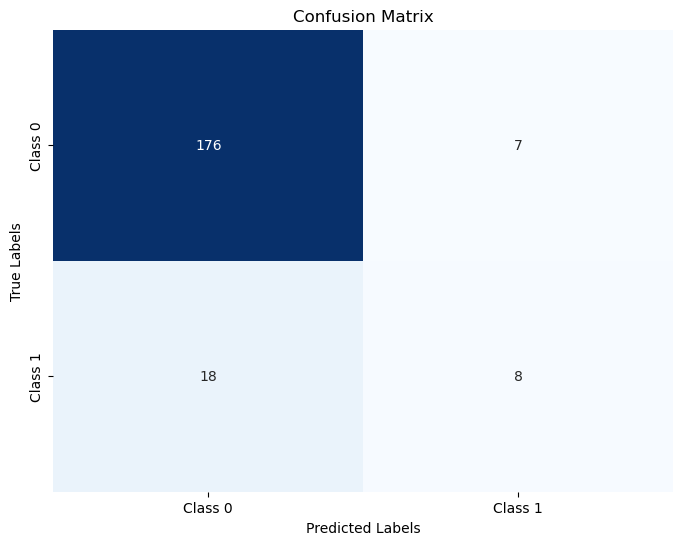

In [78]:
param_grid6ai = {
    'max_depth': [5, 6, 7, 8, 9],
}
best_params6ai, best_model6ai = grid_searcher(param_grid6ai, best_model6a, 'average_precision')
model_test(best_model6ai)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
Time taken: 138.25181341171265 seconds
Best Hyperparameters: {'learning_rate': 0.1, 'reg_lambda': 2.4000000000000004}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.95      0.93       183
     Class 1       0.47      0.35      0.40        26

    accuracy                           0.87       209
   macro avg       0.69      0.65      0.66       209
weighted avg       0.86      0.87      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       173 |        10 |
+-----------+-----------+
|        17 |         9 |
+-----------+-----------+


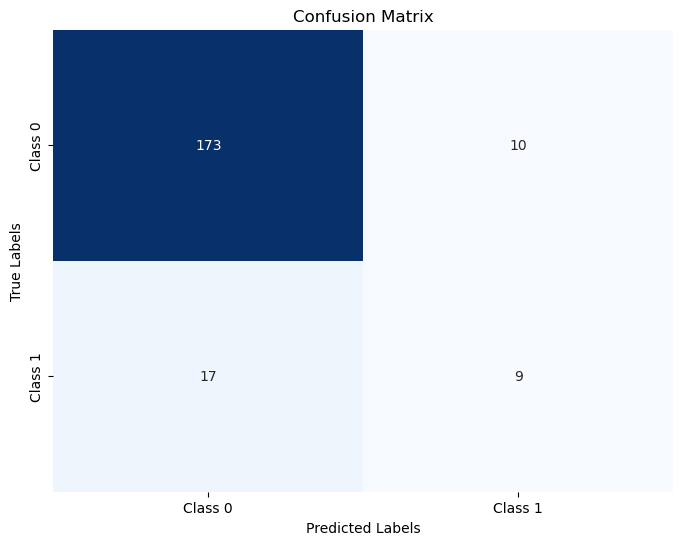

In [79]:
param_grid6b = {
    'reg_lambda': list(np.arange(0.1, 10.1, 0.1)),
    'learning_rate': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
}
best_params6b, best_model6b = grid_searcher(param_grid6b, best_model6a, 'average_precision')
model_test(best_model6b)

Fitting 10 folds for each of 99 candidates, totalling 990 fits
Time taken: 17.211551189422607 seconds
Best Hyperparameters: {'learning_rate': 0.09999999999999999}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.95      0.93       183
     Class 1       0.47      0.35      0.40        26

    accuracy                           0.87       209
   macro avg       0.69      0.65      0.66       209
weighted avg       0.86      0.87      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       173 |        10 |
+-----------+-----------+
|        17 |         9 |
+-----------+-----------+


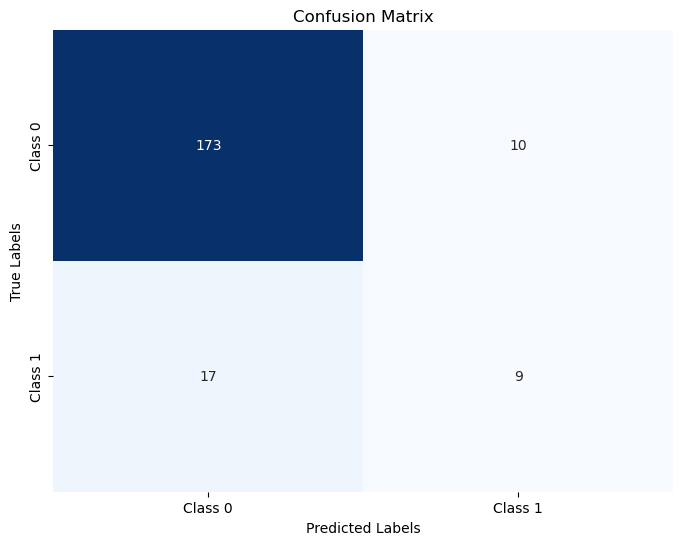

In [80]:
param_grid6c = {
    'learning_rate': list(np.arange(0.01, 1, 0.01))
}
best_params6c, best_model6c = grid_searcher(param_grid6c, best_model6b, 'average_precision')
model_test(best_model6c)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
Time taken: 28.41711401939392 seconds
Best Hyperparameters: {'colsample_bytree': 0.7, 'min_child_weight': 1, 'subsample': 0.9}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.96      0.93       183
     Class 1       0.47      0.27      0.34        26

    accuracy                           0.87       209
   macro avg       0.68      0.61      0.63       209
weighted avg       0.85      0.87      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        19 |         7 |
+-----------+-----------+


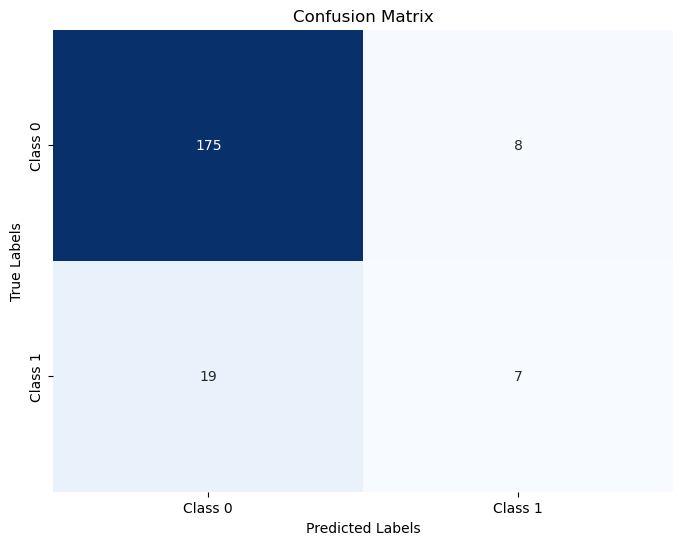

In [81]:
param_grid6d = {
    'min_child_weight': [1, 2, 3, 4, 5],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
}
best_params6d, best_model6d = grid_searcher(param_grid6d, best_model6c, 'average_precision')
model_test(best_model6d)

Fitting 10 folds for each of 375 candidates, totalling 3750 fits
Time taken: 61.82286715507507 seconds
Best Hyperparameters: {'gamma': 0, 'max_delta_step': 0, 'reg_alpha': 0.1, 'scale_pos_weight': 2}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.93      0.92       183
     Class 1       0.40      0.31      0.35        26

    accuracy                           0.86       209
   macro avg       0.65      0.62      0.63       209
weighted avg       0.84      0.86      0.85       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       171 |        12 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


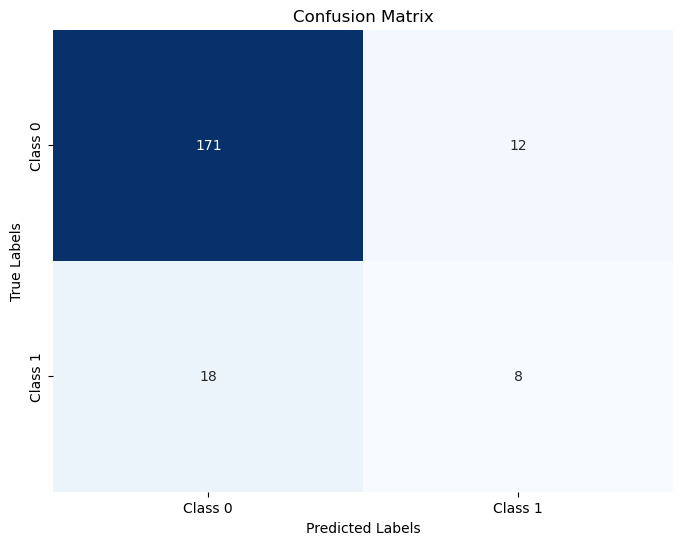

In [82]:
param_grid6e = {
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0.01, 0.1, 1, 10, 100],
    'scale_pos_weight': [1, 2, 3, 4, 5],
    'max_delta_step': [0, 1, 2],
}
best_params6e, best_model6e = grid_searcher(param_grid6e, best_model6d, 'average_precision')
model_test(best_model6e)

Fitting 10 folds for each of 99 candidates, totalling 990 fits
Time taken: 23.534212350845337 seconds
Best Hyperparameters: {'reg_alpha': 0.09999999999999999}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.93      0.92       183
     Class 1       0.40      0.31      0.35        26

    accuracy                           0.86       209
   macro avg       0.65      0.62      0.63       209
weighted avg       0.84      0.86      0.85       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       171 |        12 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


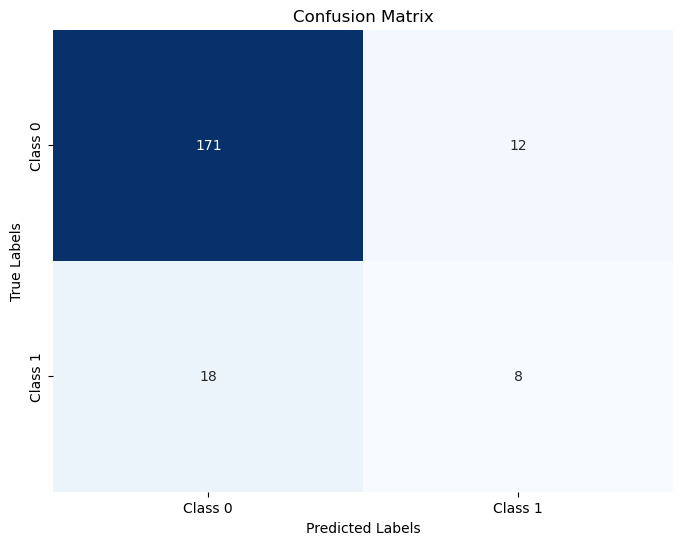

In [83]:
param_grid6f = {
    'reg_alpha': list(np.arange(0.01, 1, 0.01)),
}
best_params6f, best_model6f = grid_searcher(param_grid6f, best_model6e, 'average_precision')
model_test(best_model6f)

# BALANCED_ACCURACY

Fitting 10 folds for each of 620 candidates, totalling 6200 fits
Time taken: 193.3738341331482 seconds
Best Hyperparameters: {'max_depth': 7, 'n_estimators': 180, 'reg_lambda': 0.1}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93       183
     Class 1       0.53      0.31      0.39        26

    accuracy                           0.88       209
   macro avg       0.72      0.63      0.66       209
weighted avg       0.86      0.88      0.87       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       176 |         7 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


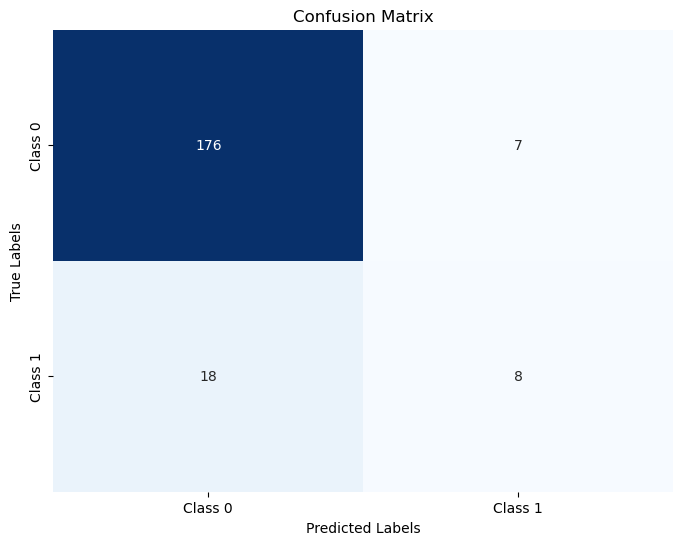

In [85]:
param_grid7a = {
    'n_estimators': list(np.arange(100, 401, 10)),
    'max_depth': [3, 4, 5, 6, 7],
    'reg_lambda': [0.1, 1, 10, 100],
}
best_params7a, best_model7a = grid_searcher(param_grid7a, model1, 'balanced_accuracy')
model_test(best_model7a)

Fitting 10 folds for each of 594 candidates, totalling 5940 fits
Time taken: 204.79241299629211 seconds
Best Hyperparameters: {'learning_rate': 1, 'reg_lambda': 2.8000000000000003}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93       183
     Class 1       0.50      0.31      0.38        26

    accuracy                           0.88       209
   macro avg       0.70      0.63      0.66       209
weighted avg       0.86      0.88      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


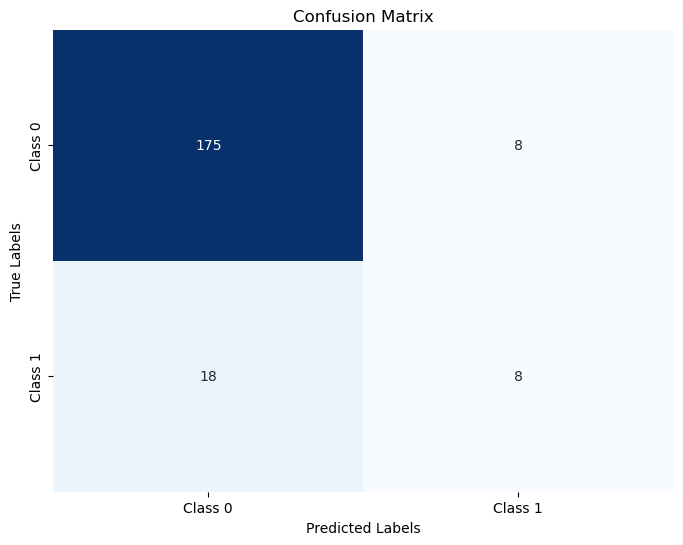

In [86]:
param_grid7b = {
    'reg_lambda': list(np.arange(0.1, 10, 0.1)),
    'learning_rate': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
}
best_params7b, best_model7b = grid_searcher(param_grid7b, best_model7a, 'balanced_accuracy')
model_test(best_model7b)

Fitting 10 folds for each of 99 candidates, totalling 990 fits
Time taken: 31.04768681526184 seconds
Best Hyperparameters: {'learning_rate': 0.19}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93       183
     Class 1       0.50      0.31      0.38        26

    accuracy                           0.88       209
   macro avg       0.70      0.63      0.66       209
weighted avg       0.86      0.88      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


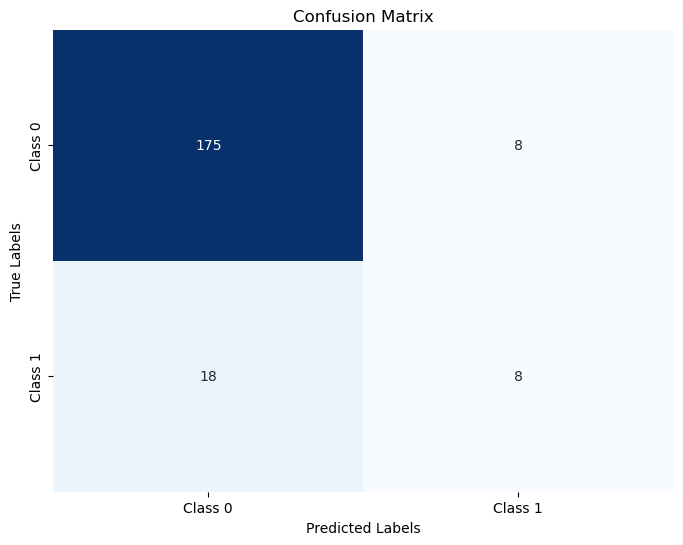

In [87]:
param_grid7c = {
    'learning_rate': list(np.arange(1e-2, 1, 1e-2))
}
best_params7c, best_model7c = grid_searcher(param_grid7c, best_model7b, 'balanced_accuracy')
model_test(best_model7c)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
Time taken: 37.286174058914185 seconds
Best Hyperparameters: {'colsample_bytree': 0.8, 'min_child_weight': 1, 'subsample': 0.5}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93       183
     Class 1       0.53      0.31      0.39        26

    accuracy                           0.88       209
   macro avg       0.72      0.63      0.66       209
weighted avg       0.86      0.88      0.87       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       176 |         7 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


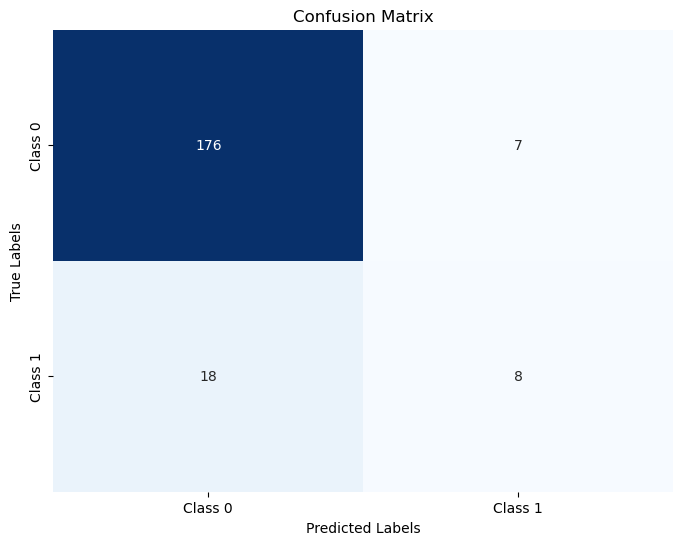

In [88]:
param_grid7d = {
    'min_child_weight': [1, 2, 3, 4, 5],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
}
best_params7d, best_model7d = grid_searcher(param_grid7d, best_model7c, 'balanced_accuracy')
model_test(best_model7d)

Fitting 10 folds for each of 375 candidates, totalling 3750 fits
Time taken: 70.65839791297913 seconds
Best Hyperparameters: {'gamma': 0.2, 'max_delta_step': 1, 'reg_alpha': 0.1, 'scale_pos_weight': 1}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93       183
     Class 1       0.50      0.31      0.38        26

    accuracy                           0.88       209
   macro avg       0.70      0.63      0.66       209
weighted avg       0.86      0.88      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


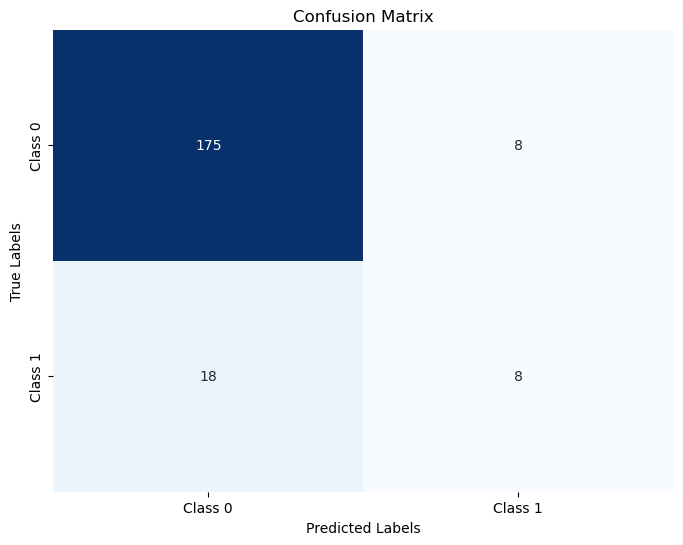

In [89]:
param_grid7e = {
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0.01, 0.1, 1, 10, 100],
    'scale_pos_weight': [1, 2, 3, 4, 5],
    'max_delta_step': [0, 1, 2],
}
best_params7e, best_model7e = grid_searcher(param_grid7e, best_model7d, 'balanced_accuracy')
model_test(best_model7e)

Fitting 10 folds for each of 99 candidates, totalling 990 fits
Time taken: 22.67346692085266 seconds
Best Hyperparameters: {'reg_alpha': 0.43}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.96      0.93       183
     Class 1       0.47      0.27      0.34        26

    accuracy                           0.87       209
   macro avg       0.68      0.61      0.63       209
weighted avg       0.85      0.87      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        19 |         7 |
+-----------+-----------+


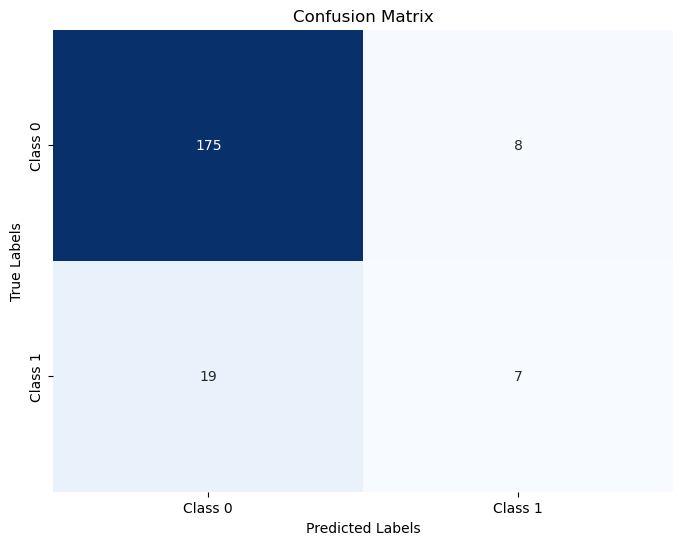

In [90]:
param_grid7f = {
    'reg_alpha': list(np.arange(0.01, 1, 0.01)),
}
best_params7f, best_model7f = grid_searcher(param_grid7f, best_model7e, 'balanced_accuracy')
model_test(best_model7f)

# JACCARD

Fitting 10 folds for each of 620 candidates, totalling 6200 fits
Time taken: 179.36566066741943 seconds
Best Hyperparameters: {'max_depth': 7, 'n_estimators': 180, 'reg_lambda': 0.1}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93       183
     Class 1       0.53      0.31      0.39        26

    accuracy                           0.88       209
   macro avg       0.72      0.63      0.66       209
weighted avg       0.86      0.88      0.87       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       176 |         7 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


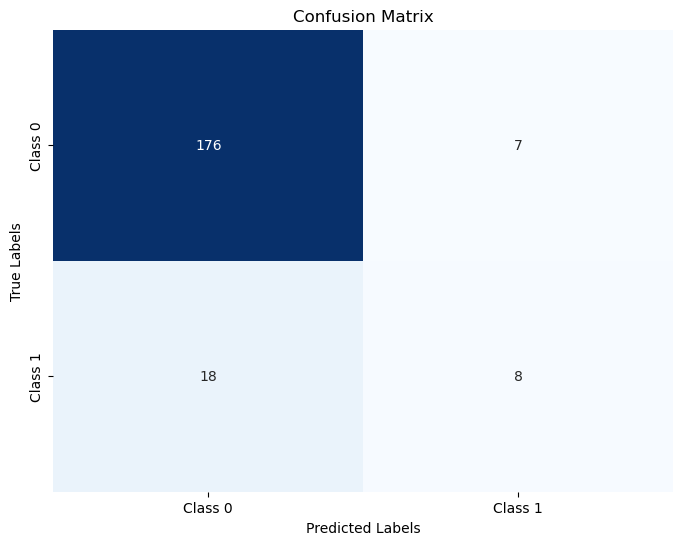

In [92]:
param_grid8a = {
    'n_estimators': list(np.arange(100, 401, 10)),
    'max_depth': [3, 4, 5, 6, 7],
    'reg_lambda': [0.1, 1, 10, 100],
}
best_params8a, best_model8a = grid_searcher(param_grid8a, model1, 'jaccard')
model_test(best_model8a)

Fitting 10 folds for each of 594 candidates, totalling 5940 fits
Time taken: 209.64473843574524 seconds
Best Hyperparameters: {'learning_rate': 1, 'reg_lambda': 2.8000000000000003}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93       183
     Class 1       0.50      0.31      0.38        26

    accuracy                           0.88       209
   macro avg       0.70      0.63      0.66       209
weighted avg       0.86      0.88      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


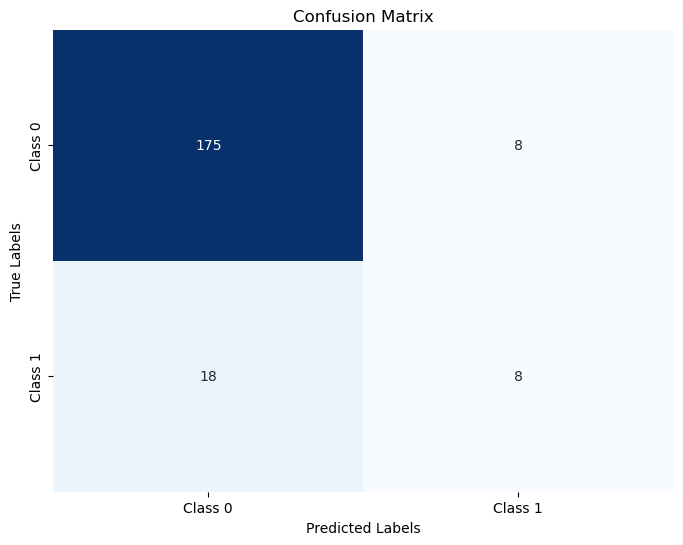

In [93]:
param_grid8b = {
    'reg_lambda': list(np.arange(0.1, 10, 0.1)),
    'learning_rate': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
}
best_params8b, best_model8b = grid_searcher(param_grid8b, best_model8a, 'jaccard')
model_test(best_model8b)

Fitting 10 folds for each of 99 candidates, totalling 990 fits
Time taken: 24.788714170455933 seconds
Best Hyperparameters: {'learning_rate': 0.19}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93       183
     Class 1       0.50      0.31      0.38        26

    accuracy                           0.88       209
   macro avg       0.70      0.63      0.66       209
weighted avg       0.86      0.88      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


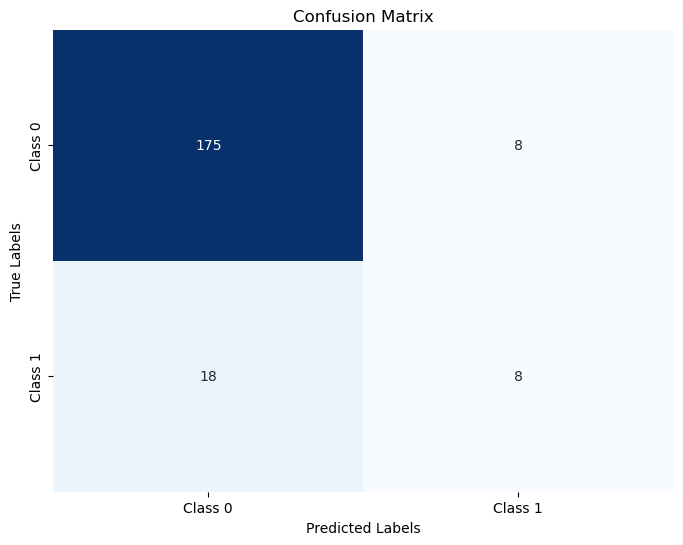

In [94]:
param_grid8c = {
    'learning_rate': list(np.arange(1e-2, 1, 1e-2))
}
best_params8c, best_model8c = grid_searcher(param_grid8c, best_model8b, 'jaccard')
model_test(best_model8c)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
Time taken: 35.77795910835266 seconds
Best Hyperparameters: {'colsample_bytree': 0.8, 'min_child_weight': 1, 'subsample': 0.5}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93       183
     Class 1       0.53      0.31      0.39        26

    accuracy                           0.88       209
   macro avg       0.72      0.63      0.66       209
weighted avg       0.86      0.88      0.87       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       176 |         7 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


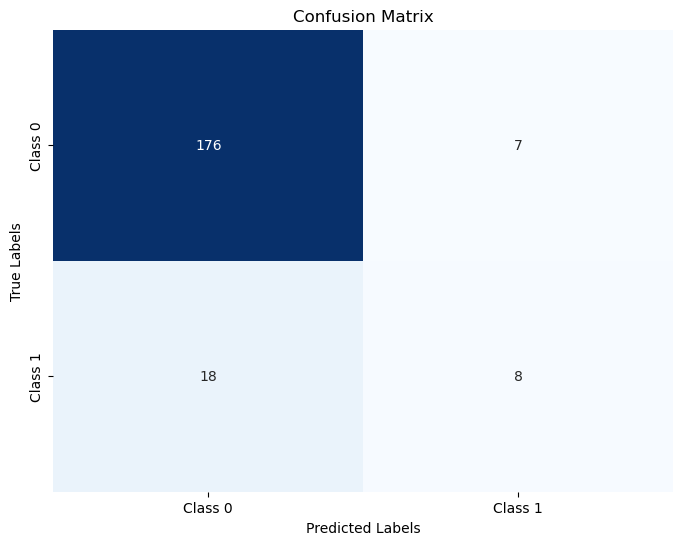

In [95]:
param_grid8d = {
    'min_child_weight': [1, 2, 3, 4, 5],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
}
best_params8d, best_model8d = grid_searcher(param_grid8d, best_model8c, 'jaccard')
model_test(best_model8d)

Fitting 10 folds for each of 375 candidates, totalling 3750 fits
Time taken: 71.05017828941345 seconds
Best Hyperparameters: {'gamma': 0.2, 'max_delta_step': 1, 'reg_alpha': 0.1, 'scale_pos_weight': 1}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.91      0.96      0.93       183
     Class 1       0.50      0.31      0.38        26

    accuracy                           0.88       209
   macro avg       0.70      0.63      0.66       209
weighted avg       0.86      0.88      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        18 |         8 |
+-----------+-----------+


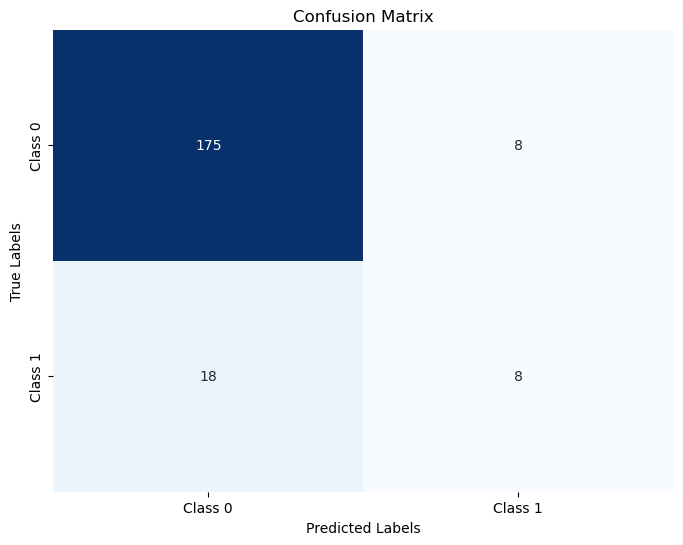

In [98]:
param_grid8e = {
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0.01, 0.1, 1, 10, 100],
    'scale_pos_weight': [1, 2, 3, 4, 5],
    'max_delta_step': [0, 1, 2],
}
best_params8e, best_model8e = grid_searcher(param_grid8e, best_model8d, 'jaccard')
model_test(best_model8e)

Fitting 10 folds for each of 99 candidates, totalling 990 fits
Time taken: 16.57203507423401 seconds
Best Hyperparameters: {'reg_alpha': 0.43}
Classification Report on Test Set:
              precision    recall  f1-score   support

     Class 0       0.90      0.96      0.93       183
     Class 1       0.47      0.27      0.34        26

    accuracy                           0.87       209
   macro avg       0.68      0.61      0.63       209
weighted avg       0.85      0.87      0.86       209

Confusion Matrix:
+-----------+-----------+
|   Class 0 |   Class 1 |
+===========+===========+
|       175 |         8 |
+-----------+-----------+
|        19 |         7 |
+-----------+-----------+


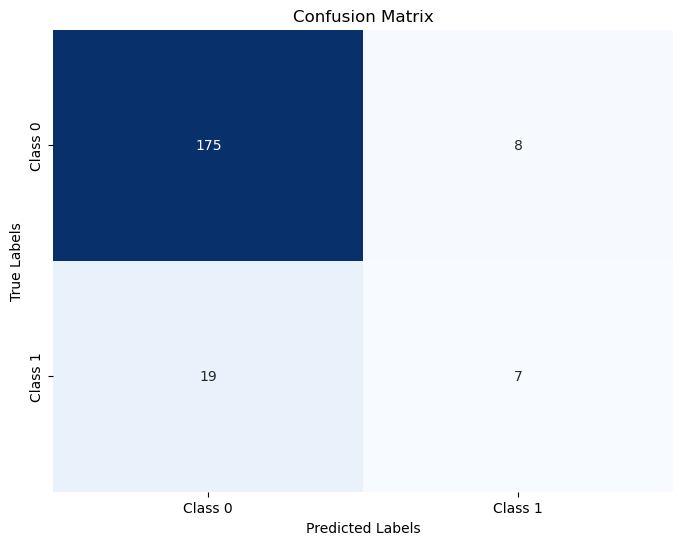

In [99]:
param_grid8f = {
    'reg_alpha': list(np.arange(0.01, 1, 0.01))
}
best_params8f, best_model8f = grid_searcher(param_grid8f, best_model8e, 'jaccard')
model_test(best_model8f)